In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("merged_cleaned_data-Copy1.csv")
del df["Unnamed: 0"]
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'AGE', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [3]:
#Brand vs job industry purchases
pd.crosstab(df["brand"], df["job_industry_category"])

job_industry_category,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications
brand,,,,,,,,,
Giant Bicycles,114,148,763,578,214,835,257,351,80
Norco Bicycles,95,122,679,581,205,664,214,314,57
OHM Cycles,99,116,726,547,190,735,258,328,67
Solex,163,163,951,790,286,1065,341,444,89
Trek Bicycles,107,127,719,562,195,716,210,322,50
WeareA2B,109,143,775,603,235,768,274,346,70


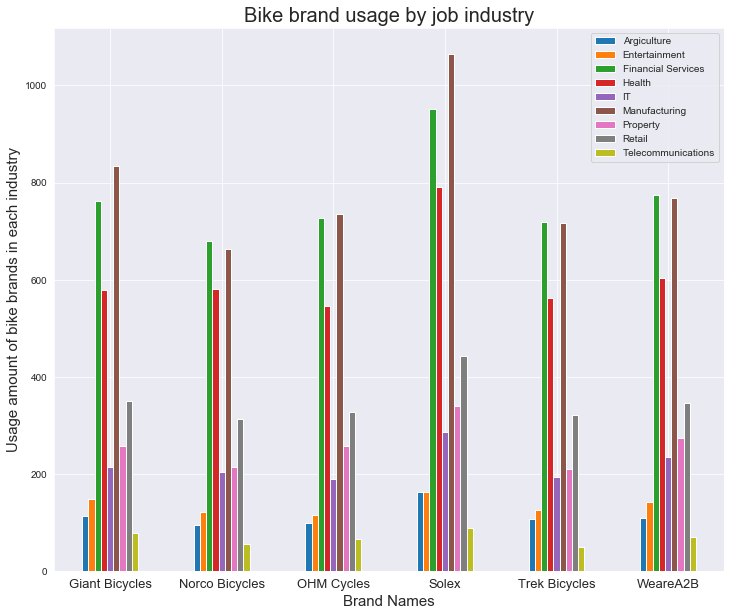

In [4]:
#Visualizing the brand vs job category
sns.set_style("darkgrid")
pd.crosstab(df["brand"], df["job_industry_category"]).plot(kind = "bar",
                                                           figsize = (12,10));
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title("Bike brand usage by job industry", size =20)
plt.xlabel("Brand Names", size = 15)
plt.ylabel("Usage amount of bike brands in each industry", size = 15)
plt.xticks(rotation = 0, size = 13);

In [5]:
#Brand vs profit
df["profit"] = df["list_price"] - df["standard_cost"]
df['profit'].head()

0      17.87
1     448.68
2     179.44
3    1702.55
4     451.65
Name: profit, dtype: float64

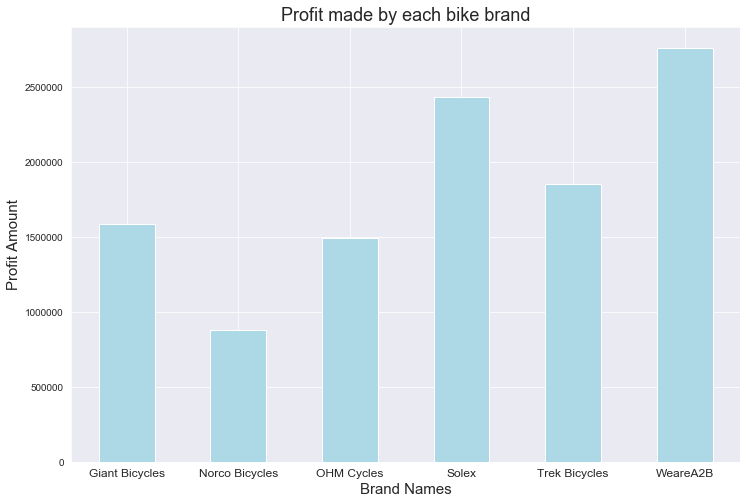

In [6]:
#Visualizing the brand vs profit
df.groupby("brand")["profit"].sum().plot(figsize = (12,8),
                                         color = ("lightblue"),
                                         kind = "bar")
plt.title("Profit made by each bike brand", size = 18);
plt.xlabel("Brand Names", size = 15)
plt.ylabel("Profit Amount", size = 15)
plt.xticks(rotation = 0, size =12);

In [7]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'AGE', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [8]:
#Convert AGE into groups 18~27,28~37,38~47,48~57, 58~67, 68~77,78~88 
for i in df["AGE"]:
    if i>17 and i<28:
        df["AGE"].replace([i], "18~27", inplace = True)  
    elif i>27 and i<38:  
        df["AGE"].replace([i], "28~37", inplace = True)
    elif i>37 and i<48:
        df["AGE"].replace([i], "38~47", inplace = True)
    elif i>47 and i<58:
        df["AGE"].replace([i], "48~57", inplace = True)
    elif i>57 and i<68:
        df["AGE"].replace([i], "58~67", inplace= True)
    elif i>67 and i<78:
        df["AGE"].replace([i], "68~77", inplace = True)
    else:
        df["AGE"].replace([i], "78~88", inplace = True)
        

In [9]:
#Crosstab AGE vs Product Size (which age group uses which size of the bike)
pd.crosstab(df['AGE'], df["product_size"])

product_size,large,medium,small
AGE,,,
18~27,677,2121,474
28~37,674,2176,484
38~47,1374,4530,990
48~57,690,2315,499
58~67,595,1917,401
68~77,1,12,3
78~88,4,15,8


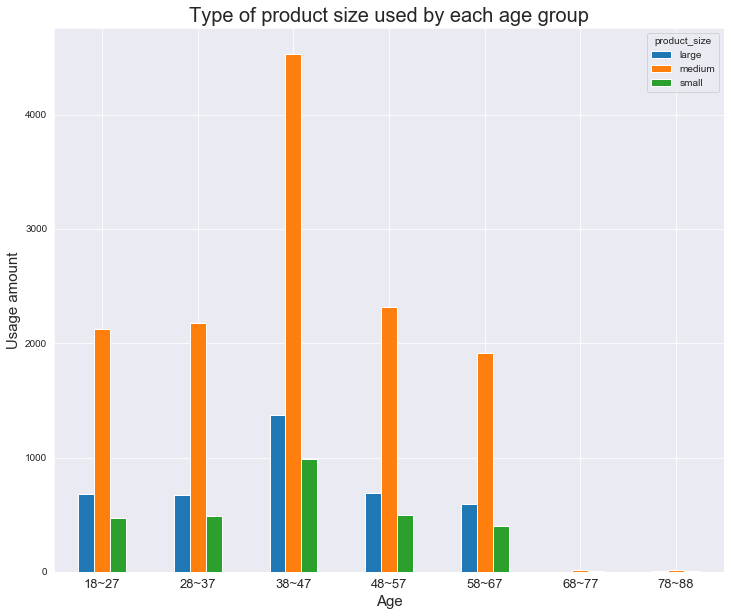

In [10]:
#Visualize AGE vs Product size 
pd.crosstab(df['AGE'], df["product_size"]).plot(kind = "bar",
                                                figsize = (12,10))
plt.ylabel("Usage amount", size = 15)
plt.xlabel("Age", size = 15);
plt.title("Type of product size used by each age group", size = 20)
plt.xticks(rotation = 0, size = 13);


In [11]:
#Product line vs past 3 years bike related purchases (the sum)
pro_line_vs_pur = df.groupby("product_line")['past_3_years_bike_related_purchases'].sum()


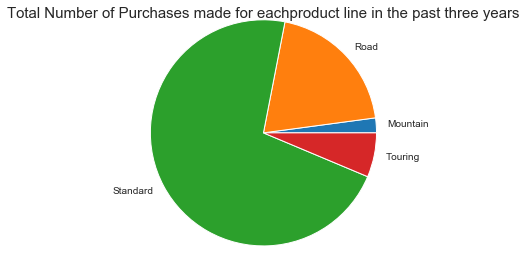

In [12]:
pro_line_vs_pur.plot(kind = "pie",
                     use_index = False,
                     radius=1.3)
plt.title("Total Number of Purchases made for each" 
           "product line in the past three years", size = 15);
plt.ylabel(None);



In [13]:
#Tenure vs age of the customer 
tenure_vs_age = df.groupby("AGE")["tenure"].sum()
tenure_vs_age

AGE
18~27    12243
28~37    35781
38~47    86086
48~57    41922
58~67    36843
68~77      203
78~88      313
Name: tenure, dtype: int64

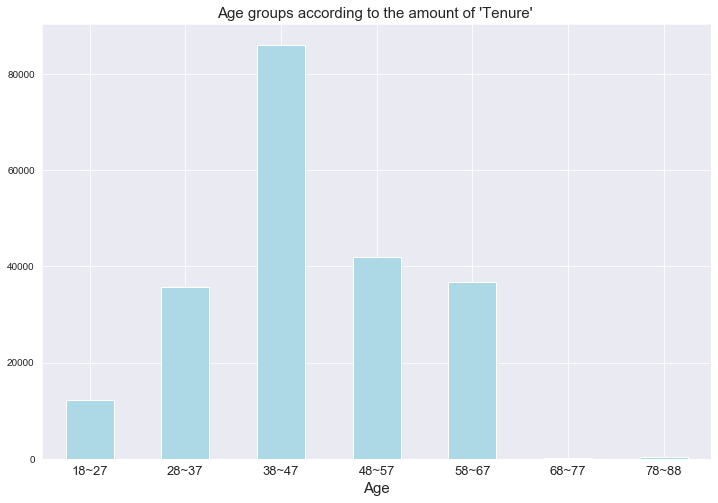

In [14]:
tenure_vs_age.plot(kind = "bar",
                   color = "lightblue",
                   figsize = (12,8))
plt.title("Age groups according to the amount of 'Tenure' ", size = 15);
plt.xlabel("Age", size = 15)
plt.xticks(rotation =0, size = 13);


In [37]:
df["job_industry_category"].value_counts()

Manufacturing         4783
Financial Services    4613
Health                3661
Retail                2105
Property              1554
IT                    1325
Entertainment          819
Argiculture            687
Telecommunications     413
Name: job_industry_category, dtype: int64

In [38]:
#Replace the values of the column "job_industry_title" for easy read
df['job_industry_category'] = df['job_industry_category'].replace("Manufacturing","Manu")
df['job_industry_category'] = df['job_industry_category'].replace("Financial Services","Finance")
df['job_industry_category'] = df['job_industry_category'].replace("Entertainment","Entertain")
df['job_industry_category'] = df['job_industry_category'].replace("Argiculture","Agri")
df['job_industry_category'] = df['job_industry_category'].replace("Telecommunications","Telecom")





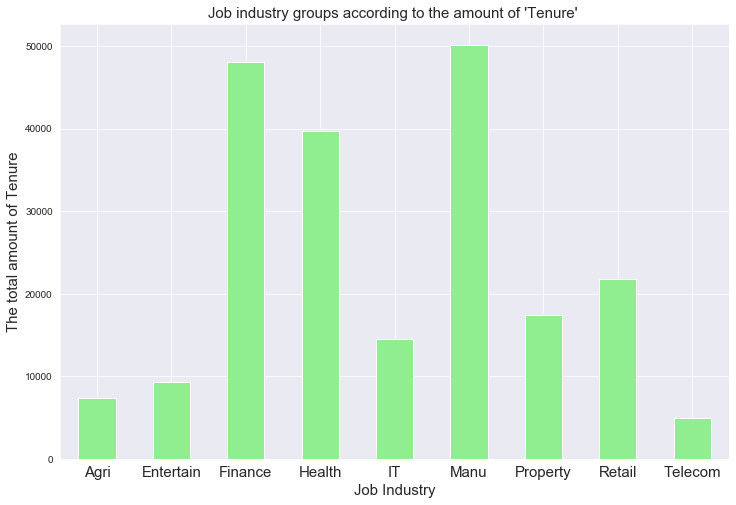

In [42]:
#Tenure vs Job industry category 
tenure_vs_job_indst = df.groupby('job_industry_category')["tenure"].sum()
tenure_vs_job_indst.plot(kind = "bar",
                         figsize = (12,8),
                         color = "lightgreen");
plt.title("Job industry groups according to the amount of 'Tenure' ", size = 15);
plt.xlabel("Job Industry", size = 15)
plt.ylabel("The total amount of Tenure", size = 15)
plt.xticks(rotation =0, size = 15);
